# Assignment 5: Deep Learning {-}

This assignment aims at familiarizing you with training and testing a Deep Neural Network (DNN). The dataset you will be working on is CIFAR-10. You will have to do:

1.  **(5 points) Coding tasks:** The following questions involve writing code to complete specific tasks.  
    1.1 *(1 point)* Load the CIFAR-10 dataset, visualize sample images, and perform data normalization to improve training performance.  
    1.2 *(1 point)* First network: Build, train, and test a deep neural network with at least three convolutional layers, two fully connected layers, and two pooling layers.  
    1.3 *(1 point)* Second network: Build, train, and test another deep neural network, with an architecture of your choice, but at most 4M (four million) parameters, ensuring the architecture meets this constraint by verifying with model.summary().  
    1.4 *(2 points)* Modify the second network architecture by tuning the layer hyperparameters or adjusting the layer design to improve test accuracy while remaining within the four million parameter limit. Discuss your observations and the trade offs of the changes you make.  

2.  **(5 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    2.1 *(1 point)* How did hyperparameter tuning (learning rate, dropout, batch size) affect your model’s accuracy? Were there any unexpected results?  
    2.2 *(1 point)* How did the constraint of keeping the model within 4 million parameters impact your design choices? Would a larger model necessarily perform better?  
    2.3 *(1 point)* How can deep learning models trained on datasets like CIFAR-10 be applied in real-world scenarios? Give an example.  
    2.4 *(1 point)* Deep learning models for image recognition can have biases. What ethical concerns should be considered when deploying such models?  
    2.5 *(1 point)* What was the most interesting or challenging part of this assignment? If you had more time, what additional improvements would you make?  

The dataset you will be working on is CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html) which consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. Here follows the ten object classes:
* airplane
*	automobile
*	bird
*	cat
*	deer
*	dog
*	frog
*	horse
*	ship
*	truck

Here follows some data samples in the dataset:

![alt text](https://docs.pytorch.org/tutorials/_images/cifar10.png)

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment5-notebook.ipynb: Jupyter notebook containing source code.
- ./\<Test-accuracy>-\<StudentID>.txt: accuracy of the second network on the test set (for extra credit, see the 'Evaluation' part below). For example if you get 0.8124 accuracy, the name of this file is 08124-2012345.txt. The file content is left empty.

The submission folder is named ML4DS-\<StudentID>-Assignment5 (e.g., ML4DS-2012345-Assigment5) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have modeling steps other than the basic requirements and achieve an excellent model accuracy. In addition, your code should conform to a Python coding convention such as PEP-8.

EXTRA CREDIT: Top-3 submissions achieving the highest test accuracy on the second network (of 4M params at most) will be rewarded an extra credit. **You have to ensure the architecture meets this constraint by verifying and printing out the number of parameters with model.summary(). Please follow the submission format to be eligible for this extra credit.**

### Deadline {-}
Please visit Canvas for details.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras              # Keras is the high-level API of TensorFlow
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

2025-12-09 02:54:05.053499: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-09 02:54:05.125516: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2025-12-09 02:54:06.760406: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:

tf.config.set_visible_devices([], 'GPU')


W0000 00:00:1765223649.695210  552186 gpu_device.cc:2431] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1765223649.705665  552186 gpu_device.cc:2431] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.


In [3]:
# PLEASE DO NOT CHANGE THIS CODE

# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

y_train = y_train.reshape(-1,)
y_val = y_val.reshape(-1,)
y_test = y_test.reshape(-1,)


print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Validation shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (45000, 32, 32, 3), y_train = (45000,)
Validation shape: X_val = (5000, 32, 32, 3), y_val = (5000,)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000,)


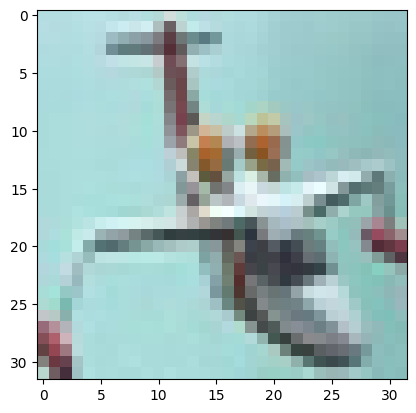

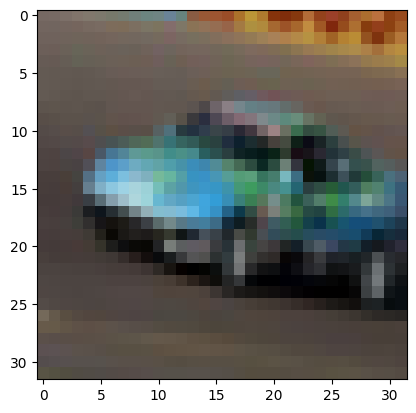

In [4]:
# Show some samples in the dataset
import matplotlib.pyplot as plt
imgplot = plt.imshow(X_train[44999])
plt.show()
imgplot = plt.imshow(X_test[4999])
plt.show()

## 1. Coding tasks

1. Load the CIFAR-10 dataset, visualize sample images, and perform data normalization to improve training performance.

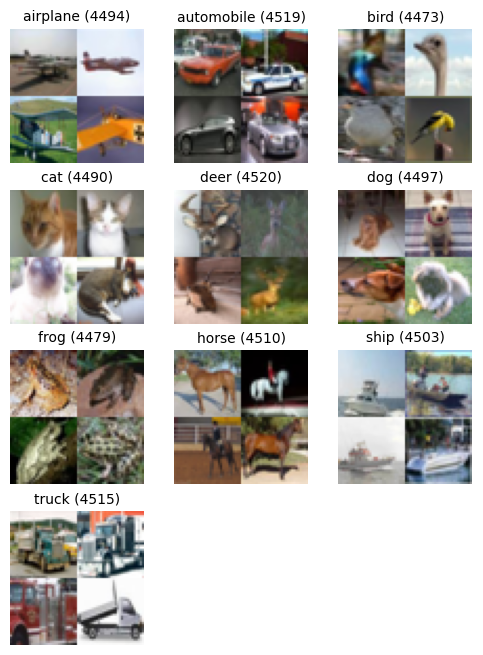

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 class names
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Count how many samples belong to each class
class_counts = np.bincount(y_train.flatten(), minlength=10)

# For each class, collect indices of all images
class_indices = {i: np.where(y_train.flatten() == i)[0] for i in range(10)}

# Plot setup
fig, axes = plt.subplots(4, 3, figsize=(6, 8))
axes = axes.flatten()

for i in range(10):
    ax = axes[i]

    # Randomly pick 4 images from this class
    idxs = np.random.choice(class_indices[i], 4, replace=False)
    imgs = X_train[idxs]

    # Create a small 2x2 grid inside the subplot
    combined = np.zeros((64, 64, 3), dtype=np.uint8)  # 32*2 = 64 pixels per side
    combined[:32, :32] = imgs[0]
    combined[:32, 32:] = imgs[1]
    combined[32:, :32] = imgs[2]
    combined[32:, 32:] = imgs[3]

    ax.imshow(combined)
    ax.set_title(f"{class_names[i]} ({class_counts[i]})", fontsize=10)
    ax.axis("off")

# Turn off remaining unused subplots
for ax in axes[10:]:
    ax.axis("off")

plt.show()


In [6]:
# Convert pixel values from 0–255 to 0–1 (normalizing)
X_train_norm = X_train.astype("float32") / 255.0
X_val_norm = X_val.astype("float32") / 255.0
X_test_norm = X_test.astype("float32") / 255.0

print("Data normalized: pixel values are now between 0 and 1.")
print("Random normalized pixel: ", X_train_norm[44998][16][16])

Data normalized: pixel values are now between 0 and 1.
Random normalized pixel:  [0.09803922 0.07058824 0.0627451 ]


In [7]:
#training setup
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
print("Training on:", device)

# Convert to tensors
X_train_t = torch.tensor(X_train_norm, dtype=torch.float32).permute(0, 3, 1, 2)
X_val_t   = torch.tensor(X_val_norm, dtype=torch.float32).permute(0, 3, 1, 2)
X_test_t  = torch.tensor(X_test_norm, dtype=torch.float32).permute(0, 3, 1, 2)

y_train_t = torch.tensor(y_train.reshape(-1), dtype=torch.long)
y_val_t   = torch.tensor(y_val.reshape(-1), dtype=torch.long)
y_test_t  = torch.tensor(y_test.reshape(-1), dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=128, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=128)
test_loader  = DataLoader(TensorDataset(X_test_t, y_test_t), batch_size=128)

Training on: cuda:1


2. First network: Build, train, and test a deep neural network with at least three convolutional layers, two fully connected layers, and two pooling layers

In [8]:
# -------------------------
# Model
# -------------------------
class MyCNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout2d(0.2),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
            nn.Dropout2d(0.2)
        )

        self.block2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Dropout2d(0.2),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Dropout2d(0.2),
            nn.MaxPool2d(2)
        )

        self.block3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Dropout2d(0.2),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Dropout2d(0.2)
        )

        self.gap = nn.AdaptiveAvgPool2d((1, 1))

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Dropout(0.35),
            nn.Linear(512, 10)
        )
        
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.gap(x)
        x = self.fc(x)
        return x

model = MyCNN().to(device)
print(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# -------------------------
# Train + Evaluate
# -------------------------
train_losses = []
val_accuracies = []

def train_one_epoch():
    model.train()
    total_loss = 0

    for X, y in train_loader:
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(train_loader)

def evaluate(loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for X, y in loader:
            X, y = X.to(device), y.to(device)
            pred = model(X).argmax(1)
            correct += (pred == y).sum().item()
            total += y.size(0)

    return correct / total


# -------------------------
# Run training
# -------------------------
for epoch in range(1, 31):
    train_loss = train_one_epoch()
    val_acc = evaluate(val_loader)

    train_losses.append(train_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch:2d} | Loss: {train_loss:.4f} | Val Acc: {val_acc:.4f}")

# -------------------------
# Test accuracy
# -------------------------
test_acc = evaluate(test_loader)
print("Test accuracy:", test_acc)


MyCNN(
  (block1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout2d(p=0.2, inplace=False)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Dropout2d(p=0.2, inplace=False)
  )
  (block2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout2d(p=0.2, inplace=False)
    (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): D

Epoch  1 | Loss: 1.5182 | Val Acc: 0.5616


Epoch  2 | Loss: 1.1301 | Val Acc: 0.6328


Epoch  3 | Loss: 0.9832 | Val Acc: 0.6924


Epoch  4 | Loss: 0.8697 | Val Acc: 0.7326


Epoch  5 | Loss: 0.7748 | Val Acc: 0.7598


Epoch  6 | Loss: 0.7027 | Val Acc: 0.7862


Epoch  7 | Loss: 0.6367 | Val Acc: 0.7952


Epoch  8 | Loss: 0.6007 | Val Acc: 0.8190


Epoch  9 | Loss: 0.5567 | Val Acc: 0.8160


Epoch 10 | Loss: 0.5194 | Val Acc: 0.8098


Epoch 11 | Loss: 0.4947 | Val Acc: 0.8312


Epoch 12 | Loss: 0.4669 | Val Acc: 0.8414


Epoch 13 | Loss: 0.4342 | Val Acc: 0.8402


Epoch 14 | Loss: 0.4188 | Val Acc: 0.8414


Epoch 15 | Loss: 0.3981 | Val Acc: 0.8504


Epoch 16 | Loss: 0.3747 | Val Acc: 0.8494


Epoch 17 | Loss: 0.3602 | Val Acc: 0.8524


Epoch 18 | Loss: 0.3494 | Val Acc: 0.8574


Epoch 19 | Loss: 0.3315 | Val Acc: 0.8606


Epoch 20 | Loss: 0.3168 | Val Acc: 0.8594


Epoch 21 | Loss: 0.3071 | Val Acc: 0.8616


Epoch 22 | Loss: 0.2913 | Val Acc: 0.8572


Epoch 23 | Loss: 0.2858 | Val Acc: 0.8662


Epoch 24 | Loss: 0.2665 | Val Acc: 0.8578


Epoch 25 | Loss: 0.2588 | Val Acc: 0.8660


Epoch 26 | Loss: 0.2555 | Val Acc: 0.8638


Epoch 27 | Loss: 0.2437 | Val Acc: 0.8704


Epoch 28 | Loss: 0.2386 | Val Acc: 0.8686


Epoch 29 | Loss: 0.2289 | Val Acc: 0.8710


Epoch 30 | Loss: 0.2252 | Val Acc: 0.8648


Test accuracy: 0.8706


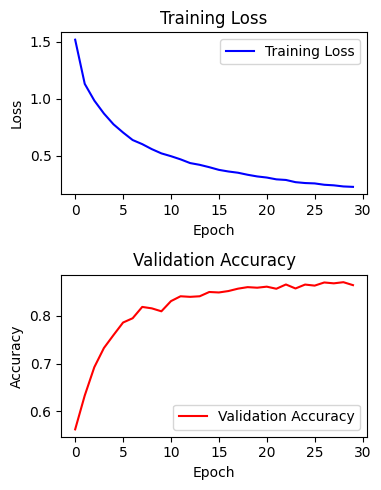

In [9]:
# Visualize training and validation performance
f, ax = plt.subplots(2, 1, figsize=(4, 5))

# Plot training loss
ax[0].plot(train_losses, color='b', label='Training Loss')
ax[0].set_title("Training Loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()

# Plot validation accuracy
ax[1].plot(val_accuracies, color='r', label='Validation Accuracy')
ax[1].set_title("Validation Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.tight_layout()
plt.show()


3. Second network: Build, train, and test another deep neural network, with an architecture of your choice, but at most 4M (four million) parameters, ensuring the architecture meets this constraint by verifying with model.summary().

In [10]:
# -------------------------
# My model resnet
# -------------------------
import torch.nn.functional as F
import torch.nn as nn
import torch

class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(channels, channels // reduction, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels // reduction, channels, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return x * self.fc(x)


class ResBlock(nn.Module):
    def __init__(self, in_c, out_c, dropout=0.05):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_c, out_c, 3, padding=1),
            nn.BatchNorm2d(out_c),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout),

            nn.Conv2d(out_c, out_c, 3, padding=1),
            nn.BatchNorm2d(out_c),
        )

        self.shortcut = nn.Conv2d(in_c, out_c, 1) if in_c != out_c else nn.Identity()
        self.se = SEBlock(out_c)

    def forward(self, x):
        out = self.conv(x)
        out = self.se(out)
        return F.relu(out + self.shortcut(x))


class BetterCNN(nn.Module):
    def __init__(self):
        super().__init__()

        # keep original width
        self.stem = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )

        self.layer1 = nn.Sequential(
            ResBlock(64, 128),
            nn.MaxPool2d(2)
        )

        self.layer2 = nn.Sequential(
            ResBlock(128, 256),
            nn.MaxPool2d(2)
        )

        self.layer3 = nn.Sequential(
            ResBlock(256, 278),
            nn.MaxPool2d(2)
        )

        self.layer4 = nn.Sequential(
            ResBlock(278, 278)
        )

        self.gap = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(278, 10)

    def forward(self, x):
        x = self.stem(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.gap(x)
        x = torch.flatten(x, 1)
        return self.fc(x)


model = BetterCNN().to(device)


In [11]:
# -------------------------
# Count Trainable Parameters
# -------------------------
def count_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

params = count_params(model)
print(f"\nTotal Trainable Parameters: {params:,}")



Total Trainable Parameters: 3,986,382


In [12]:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

# CIFAR-10 normalization constants
CIFAR10_MEAN = (0.4914, 0.4822, 0.4465)
CIFAR10_STD  = (0.2023, 0.1994, 0.2010)

# -------------------------
# Training Transformations
# -------------------------
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomRotation(degrees=15),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
    transforms.RandomGrayscale(p=0.07),
    transforms.ToTensor(),
    transforms.Normalize(CIFAR10_MEAN, CIFAR10_STD),
    transforms.RandomErasing(p=0.9, scale=(0.02, 0.15), ratio=(0.3, 3.3), value=0, inplace=False)
])

# -------------------------
# Validation/Test Transformations
# -------------------------
val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(CIFAR10_MEAN, CIFAR10_STD),
])

# -------------------------
# Convert EXISTING NumPy arrays → torch dataset using transforms
# -------------------------

class NumpyCIFAR(torch.utils.data.Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img = self.images[idx]
        label = int(self.labels[idx])
        
        # convert from NumPy (H,W,C) → PIL Image for transforms
        img = transforms.ToPILImage()(img)
        if self.transform:
            img = self.transform(img)
        return img, label

# create datasets with transforms
train_dataset = NumpyCIFAR(X_train, y_train, transform=train_transform)
val_dataset   = NumpyCIFAR(X_val,   y_val,   transform=val_transform)
test_dataset  = NumpyCIFAR(X_test,  y_test,  transform=val_transform)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=256, shuffle=False)

print("DataLoaders with augmentation are ready.")


DataLoaders with augmentation are ready.


In [13]:
# -------------------------
# Label Smoothing Cross Entropy
# -------------------------
class LabelSmoothingCrossEntropy(nn.Module):
    def __init__(self, smoothing=0.1):
        super().__init__()
        assert 0.0 <= smoothing < 1.0
        self.s = smoothing

    def forward(self, logits, target):
        n_classes = logits.size(-1)

        # log probabilities
        log_probs = F.log_softmax(logits, dim=-1)

        # create smoothed targets
        with torch.no_grad():
            true = torch.zeros_like(log_probs)
            true.fill_(self.s / (n_classes - 1))
            true.scatter_(1, target.unsqueeze(1), 1 - self.s)

        return -(true * log_probs).sum(dim=1).mean()


In [14]:
# Assuming optim and device are defined elsewhere
import torch.optim as optim 

criterion = LabelSmoothingCrossEntropy(smoothing=0.05)

# MODIFICATION: Added weight_decay (L2 regularization)
optimizer = optim.SGD(
    model.parameters(),
    lr=0.15,
    momentum=0.9,
    weight_decay=5e-4,
    nesterov=True
)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='max',
    factor=0.93,
    patience=2,
    threshold=1e-4, 
    min_lr=1e-6
)

# Setup for Gradient Clipping
MAX_NORM = 10.0

# Early stopping
best_val_acc = 0
patience = 300
wait = 0

train_losses = []
val_accuracies = []

In [15]:
import torch
import numpy as np
import random
import torch.nn.functional as F

def cutmix_data(x, y, alpha=1.0):
    """
    x: batch images (B,C,H,W)
    y: batch labels (B,)
    returns: mixed_x, y_a, y_b, lambda
    """

    if alpha <= 0:
        return x, y, y, 1.0

    lam = np.random.beta(alpha, alpha)

    batch_size = x.size(0)
    index = torch.randperm(batch_size).to(x.device)

    y_a = y
    y_b = y[index]

    # bounding box
    _, _, H, W = x.size()
    cut_w = int(W * np.sqrt(1 - lam))
    cut_h = int(H * np.sqrt(1 - lam))

    # random center
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    x1 = np.clip(cx - cut_w // 2, 0, W)
    x2 = np.clip(cx + cut_w // 2, 0, W)
    y1 = np.clip(cy - cut_h // 2, 0, H)
    y2 = np.clip(cy + cut_h // 2, 0, H)

    # apply patch
    x[:, :, y1:y2, x1:x2] = x[index][:, :, y1:y2, x1:x2]

    lam = 1 - ((x2 - x1) * (y2 - y1)) / (W * H)

    return x, y_a, y_b, lam


In [16]:
def train_one_epoch():
    model.train()
    total_loss = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        # apply cutmix
        X_cut, y_a, y_b, lam = cutmix_data(X, y, alpha=1.0)

        # forward
        out = model(X_cut)

        # compute mixed loss
        loss = lam * criterion(out, y_a) + (1 - lam) * criterion(out, y_b)

        loss.backward()
        
        # >>> MODIFICATION: Gradient Clipping
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=MAX_NORM)
        
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(train_loader)


def evaluate(loader):
    model.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for X, y in loader:
            X, y = X.to(device), y.to(device)
            pred = model(X).argmax(1)
            correct += (pred == y).sum().item()
            total += y.size(0)

    return correct / total

In [17]:
# -------------------------
# Train (with checkpoint saving)
# -------------------------

import os

# Make sure checkpoint folder exists
os.makedirs("checkpoints2", exist_ok=True)
BEST_MODEL_PATH = "checkpoints2/best_model.pt"

for epoch in range(1, 601):

    train_loss = train_one_epoch()
    val_acc = evaluate(val_loader)

    train_losses.append(train_loss)
    val_accuracies.append(val_acc)

    scheduler.step(val_acc)

    print(f"Epoch {epoch:02d} | Loss: {train_loss:.4f} | Val Acc: {val_acc:.4f}")

    # EARLY STOP & SAVE BEST CHECKPOINT
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        wait = 0
        best_state = model.state_dict()  # keep copy in RAM
        
        # --- SAVE TO DISK (important if session dies) ---
        torch.save(best_state, BEST_MODEL_PATH)
        print(f"  ➤ New best model saved at epoch {epoch} (val_acc={val_acc:.4f})")
    else:
        wait += 1
        if wait >= patience:
            print("\nEarly stopping triggered.")
            break

# Load best model (whether early stopped or completed)
model.load_state_dict(best_state)
print("\nBest validation accuracy:", best_val_acc)


Epoch 01 | Loss: 2.0779 | Val Acc: 0.4338
  ➤ New best model saved at epoch 1 (val_acc=0.4338)


Epoch 02 | Loss: 1.8682 | Val Acc: 0.4996
  ➤ New best model saved at epoch 2 (val_acc=0.4996)


Epoch 03 | Loss: 1.7633 | Val Acc: 0.6084
  ➤ New best model saved at epoch 3 (val_acc=0.6084)


Epoch 04 | Loss: 1.7042 | Val Acc: 0.6182
  ➤ New best model saved at epoch 4 (val_acc=0.6182)


Epoch 05 | Loss: 1.6467 | Val Acc: 0.6776
  ➤ New best model saved at epoch 5 (val_acc=0.6776)


Epoch 06 | Loss: 1.6174 | Val Acc: 0.7022
  ➤ New best model saved at epoch 6 (val_acc=0.7022)


Epoch 07 | Loss: 1.6063 | Val Acc: 0.7366
  ➤ New best model saved at epoch 7 (val_acc=0.7366)


Epoch 08 | Loss: 1.5675 | Val Acc: 0.7336


Epoch 09 | Loss: 1.5489 | Val Acc: 0.7448
  ➤ New best model saved at epoch 9 (val_acc=0.7448)


Epoch 10 | Loss: 1.5159 | Val Acc: 0.7448


Epoch 11 | Loss: 1.4866 | Val Acc: 0.7686
  ➤ New best model saved at epoch 11 (val_acc=0.7686)


Epoch 12 | Loss: 1.5015 | Val Acc: 0.7224


Epoch 13 | Loss: 1.4914 | Val Acc: 0.7316


Epoch 14 | Loss: 1.4865 | Val Acc: 0.7414


Epoch 15 | Loss: 1.4807 | Val Acc: 0.8016
  ➤ New best model saved at epoch 15 (val_acc=0.8016)


Epoch 16 | Loss: 1.4521 | Val Acc: 0.7744


Epoch 17 | Loss: 1.4411 | Val Acc: 0.8112
  ➤ New best model saved at epoch 17 (val_acc=0.8112)


Epoch 18 | Loss: 1.4399 | Val Acc: 0.8026


Epoch 19 | Loss: 1.4346 | Val Acc: 0.7846


Epoch 20 | Loss: 1.4270 | Val Acc: 0.7898


Epoch 21 | Loss: 1.4588 | Val Acc: 0.8004


Epoch 22 | Loss: 1.4011 | Val Acc: 0.7498


Epoch 23 | Loss: 1.4070 | Val Acc: 0.8036


Epoch 24 | Loss: 1.3945 | Val Acc: 0.8114
  ➤ New best model saved at epoch 24 (val_acc=0.8114)


Epoch 25 | Loss: 1.3970 | Val Acc: 0.8028


Epoch 26 | Loss: 1.4023 | Val Acc: 0.7974


Epoch 27 | Loss: 1.3930 | Val Acc: 0.8004


Epoch 28 | Loss: 1.3785 | Val Acc: 0.8276
  ➤ New best model saved at epoch 28 (val_acc=0.8276)


Epoch 29 | Loss: 1.3826 | Val Acc: 0.8610
  ➤ New best model saved at epoch 29 (val_acc=0.8610)


Epoch 30 | Loss: 1.3603 | Val Acc: 0.8014


Epoch 31 | Loss: 1.3849 | Val Acc: 0.8438


Epoch 32 | Loss: 1.3969 | Val Acc: 0.8392


Epoch 33 | Loss: 1.3347 | Val Acc: 0.8624
  ➤ New best model saved at epoch 33 (val_acc=0.8624)


Epoch 34 | Loss: 1.3922 | Val Acc: 0.8262


Epoch 35 | Loss: 1.3906 | Val Acc: 0.8576


Epoch 36 | Loss: 1.3564 | Val Acc: 0.8270


Epoch 37 | Loss: 1.3402 | Val Acc: 0.8524


Epoch 38 | Loss: 1.3575 | Val Acc: 0.8474


Epoch 39 | Loss: 1.3677 | Val Acc: 0.8326


Epoch 40 | Loss: 1.3578 | Val Acc: 0.8698


  ➤ New best model saved at epoch 40 (val_acc=0.8698)


Epoch 41 | Loss: 1.3240 | Val Acc: 0.8542


Epoch 42 | Loss: 1.3555 | Val Acc: 0.8716


  ➤ New best model saved at epoch 42 (val_acc=0.8716)


Epoch 43 | Loss: 1.3574 | Val Acc: 0.8726
  ➤ New best model saved at epoch 43 (val_acc=0.8726)


Epoch 44 | Loss: 1.3488 | Val Acc: 0.8586


Epoch 45 | Loss: 1.3475 | Val Acc: 0.8000


Epoch 46 | Loss: 1.3700 | Val Acc: 0.8662


Epoch 47 | Loss: 1.3140 | Val Acc: 0.8638


Epoch 48 | Loss: 1.3108 | Val Acc: 0.8668


Epoch 49 | Loss: 1.2971 | Val Acc: 0.8702


Epoch 50 | Loss: 1.3397 | Val Acc: 0.8558


Epoch 51 | Loss: 1.3309 | Val Acc: 0.8760
  ➤ New best model saved at epoch 51 (val_acc=0.8760)


Epoch 52 | Loss: 1.3245 | Val Acc: 0.8548


Epoch 53 | Loss: 1.3441 | Val Acc: 0.8608


Epoch 54 | Loss: 1.3263 | Val Acc: 0.8762
  ➤ New best model saved at epoch 54 (val_acc=0.8762)


Epoch 55 | Loss: 1.3136 | Val Acc: 0.8568


Epoch 56 | Loss: 1.3397 | Val Acc: 0.8740


Epoch 57 | Loss: 1.3249 | Val Acc: 0.8662


Epoch 58 | Loss: 1.2777 | Val Acc: 0.8710


Epoch 59 | Loss: 1.2650 | Val Acc: 0.8668


Epoch 60 | Loss: 1.3227 | Val Acc: 0.8794
  ➤ New best model saved at epoch 60 (val_acc=0.8794)


Epoch 61 | Loss: 1.2959 | Val Acc: 0.8726


Epoch 62 | Loss: 1.3048 | Val Acc: 0.8500


Epoch 63 | Loss: 1.3282 | Val Acc: 0.8792


Epoch 64 | Loss: 1.3097 | Val Acc: 0.8782


Epoch 65 | Loss: 1.3035 | Val Acc: 0.8798
  ➤ New best model saved at epoch 65 (val_acc=0.8798)


Epoch 66 | Loss: 1.2896 | Val Acc: 0.8886
  ➤ New best model saved at epoch 66 (val_acc=0.8886)


Epoch 67 | Loss: 1.2870 | Val Acc: 0.8856


Epoch 68 | Loss: 1.3063 | Val Acc: 0.8842


Epoch 69 | Loss: 1.2807 | Val Acc: 0.8692


Epoch 70 | Loss: 1.2685 | Val Acc: 0.8980
  ➤ New best model saved at epoch 70 (val_acc=0.8980)


Epoch 71 | Loss: 1.2731 | Val Acc: 0.8666


Epoch 72 | Loss: 1.2868 | Val Acc: 0.8774


Epoch 73 | Loss: 1.2993 | Val Acc: 0.8774


Epoch 74 | Loss: 1.2751 | Val Acc: 0.9094
  ➤ New best model saved at epoch 74 (val_acc=0.9094)


Epoch 75 | Loss: 1.2682 | Val Acc: 0.9000


Epoch 76 | Loss: 1.2526 | Val Acc: 0.9000


Epoch 77 | Loss: 1.2642 | Val Acc: 0.8794


Epoch 78 | Loss: 1.2702 | Val Acc: 0.9042


Epoch 79 | Loss: 1.2524 | Val Acc: 0.8878


Epoch 80 | Loss: 1.2666 | Val Acc: 0.8848


Epoch 81 | Loss: 1.2653 | Val Acc: 0.9080


Epoch 82 | Loss: 1.2474 | Val Acc: 0.8970


Epoch 83 | Loss: 1.2420 | Val Acc: 0.8918


Epoch 84 | Loss: 1.2113 | Val Acc: 0.9064


Epoch 85 | Loss: 1.2462 | Val Acc: 0.9032


Epoch 86 | Loss: 1.2328 | Val Acc: 0.8906


Epoch 87 | Loss: 1.2042 | Val Acc: 0.8856


Epoch 88 | Loss: 1.2332 | Val Acc: 0.8930


Epoch 89 | Loss: 1.2350 | Val Acc: 0.8950


Epoch 90 | Loss: 1.2228 | Val Acc: 0.9082


Epoch 91 | Loss: 1.2157 | Val Acc: 0.9052


Epoch 92 | Loss: 1.2634 | Val Acc: 0.8974


Epoch 93 | Loss: 1.2125 | Val Acc: 0.9106
  ➤ New best model saved at epoch 93 (val_acc=0.9106)


Epoch 94 | Loss: 1.2350 | Val Acc: 0.9178
  ➤ New best model saved at epoch 94 (val_acc=0.9178)


Epoch 95 | Loss: 1.2084 | Val Acc: 0.9094


Epoch 96 | Loss: 1.2068 | Val Acc: 0.8990


Epoch 97 | Loss: 1.2300 | Val Acc: 0.9128


Epoch 98 | Loss: 1.1946 | Val Acc: 0.9144


Epoch 99 | Loss: 1.2084 | Val Acc: 0.9158


Epoch 100 | Loss: 1.2356 | Val Acc: 0.9164


Epoch 101 | Loss: 1.2064 | Val Acc: 0.9200


  ➤ New best model saved at epoch 101 (val_acc=0.9200)


Epoch 102 | Loss: 1.2149 | Val Acc: 0.9210
  ➤ New best model saved at epoch 102 (val_acc=0.9210)


Epoch 103 | Loss: 1.1823 | Val Acc: 0.9188


Epoch 104 | Loss: 1.1909 | Val Acc: 0.9200


Epoch 105 | Loss: 1.1997 | Val Acc: 0.9052


Epoch 106 | Loss: 1.1494 | Val Acc: 0.9230
  ➤ New best model saved at epoch 106 (val_acc=0.9230)


Epoch 107 | Loss: 1.1713 | Val Acc: 0.9038


Epoch 108 | Loss: 1.1871 | Val Acc: 0.9152


Epoch 109 | Loss: 1.2188 | Val Acc: 0.9060


Epoch 110 | Loss: 1.1862 | Val Acc: 0.9234
  ➤ New best model saved at epoch 110 (val_acc=0.9234)


Epoch 111 | Loss: 1.1492 | Val Acc: 0.9226


Epoch 112 | Loss: 1.1815 | Val Acc: 0.9202


Epoch 113 | Loss: 1.2068 | Val Acc: 0.9214


Epoch 114 | Loss: 1.1535 | Val Acc: 0.9152


Epoch 115 | Loss: 1.1504 | Val Acc: 0.9208


Epoch 116 | Loss: 1.1691 | Val Acc: 0.9258
  ➤ New best model saved at epoch 116 (val_acc=0.9258)


Epoch 117 | Loss: 1.1896 | Val Acc: 0.9226


Epoch 118 | Loss: 1.1522 | Val Acc: 0.9178


Epoch 119 | Loss: 1.1590 | Val Acc: 0.9200


Epoch 120 | Loss: 1.1839 | Val Acc: 0.9216


Epoch 121 | Loss: 1.1743 | Val Acc: 0.9256


Epoch 122 | Loss: 1.1605 | Val Acc: 0.9214


Epoch 123 | Loss: 1.1269 | Val Acc: 0.9276
  ➤ New best model saved at epoch 123 (val_acc=0.9276)


Epoch 124 | Loss: 1.1518 | Val Acc: 0.9224


Epoch 125 | Loss: 1.1699 | Val Acc: 0.9296
  ➤ New best model saved at epoch 125 (val_acc=0.9296)


Epoch 126 | Loss: 1.1483 | Val Acc: 0.9246


Epoch 127 | Loss: 1.1857 | Val Acc: 0.9192


Epoch 128 | Loss: 1.1525 | Val Acc: 0.9288


Epoch 129 | Loss: 1.1822 | Val Acc: 0.9156


Epoch 130 | Loss: 1.1749 | Val Acc: 0.9260


Epoch 131 | Loss: 1.1538 | Val Acc: 0.9224


Epoch 132 | Loss: 1.1391 | Val Acc: 0.9290


Epoch 133 | Loss: 1.1293 | Val Acc: 0.9302
  ➤ New best model saved at epoch 133 (val_acc=0.9302)


Epoch 134 | Loss: 1.1337 | Val Acc: 0.9298


Epoch 135 | Loss: 1.1507 | Val Acc: 0.9320
  ➤ New best model saved at epoch 135 (val_acc=0.9320)


Epoch 136 | Loss: 1.1697 | Val Acc: 0.9198


Epoch 137 | Loss: 1.1397 | Val Acc: 0.9334
  ➤ New best model saved at epoch 137 (val_acc=0.9334)


Epoch 138 | Loss: 1.1550 | Val Acc: 0.9334


Epoch 139 | Loss: 1.1561 | Val Acc: 0.9364
  ➤ New best model saved at epoch 139 (val_acc=0.9364)


Epoch 140 | Loss: 1.1315 | Val Acc: 0.9288


Epoch 141 | Loss: 1.1582 | Val Acc: 0.9250


Epoch 142 | Loss: 1.1654 | Val Acc: 0.9286


Epoch 143 | Loss: 1.1376 | Val Acc: 0.9318


Epoch 144 | Loss: 1.1368 | Val Acc: 0.9268


Epoch 145 | Loss: 1.1467 | Val Acc: 0.9138


Epoch 146 | Loss: 1.1434 | Val Acc: 0.9260


Epoch 147 | Loss: 1.1151 | Val Acc: 0.9308


Epoch 148 | Loss: 1.1043 | Val Acc: 0.9296


Epoch 149 | Loss: 1.1211 | Val Acc: 0.9370
  ➤ New best model saved at epoch 149 (val_acc=0.9370)


Epoch 150 | Loss: 1.1244 | Val Acc: 0.9288


Epoch 151 | Loss: 1.1176 | Val Acc: 0.9200


Epoch 152 | Loss: 1.1506 | Val Acc: 0.9272


Epoch 153 | Loss: 1.1224 | Val Acc: 0.9326


Epoch 154 | Loss: 1.1295 | Val Acc: 0.9338


Epoch 155 | Loss: 1.0757 | Val Acc: 0.9278


Epoch 156 | Loss: 1.1349 | Val Acc: 0.9358


Epoch 157 | Loss: 1.1175 | Val Acc: 0.9360


Epoch 158 | Loss: 1.0920 | Val Acc: 0.9334


Epoch 159 | Loss: 1.0879 | Val Acc: 0.9350


Epoch 160 | Loss: 1.0848 | Val Acc: 0.9414
  ➤ New best model saved at epoch 160 (val_acc=0.9414)


Epoch 161 | Loss: 1.1181 | Val Acc: 0.9370


Epoch 162 | Loss: 1.0741 | Val Acc: 0.9380


Epoch 163 | Loss: 1.0940 | Val Acc: 0.9352


Epoch 164 | Loss: 1.1142 | Val Acc: 0.9358


Epoch 165 | Loss: 1.1052 | Val Acc: 0.9362


Epoch 166 | Loss: 1.0871 | Val Acc: 0.9418
  ➤ New best model saved at epoch 166 (val_acc=0.9418)


Epoch 167 | Loss: 1.1337 | Val Acc: 0.9418


Epoch 168 | Loss: 1.0623 | Val Acc: 0.9410


Epoch 169 | Loss: 1.1044 | Val Acc: 0.9406


Epoch 170 | Loss: 1.1270 | Val Acc: 0.9354


Epoch 171 | Loss: 1.1127 | Val Acc: 0.9394


Epoch 172 | Loss: 1.0830 | Val Acc: 0.9410


Epoch 173 | Loss: 1.0808 | Val Acc: 0.9392


Epoch 174 | Loss: 1.0975 | Val Acc: 0.9400


Epoch 175 | Loss: 1.0986 | Val Acc: 0.9456
  ➤ New best model saved at epoch 175 (val_acc=0.9456)


Epoch 176 | Loss: 1.0575 | Val Acc: 0.9406


Epoch 177 | Loss: 1.0992 | Val Acc: 0.9358


Epoch 178 | Loss: 1.0489 | Val Acc: 0.9300


Epoch 179 | Loss: 1.0822 | Val Acc: 0.9376


Epoch 180 | Loss: 1.0806 | Val Acc: 0.9396


Epoch 181 | Loss: 1.0259 | Val Acc: 0.9412


Epoch 182 | Loss: 1.0815 | Val Acc: 0.9378


Epoch 183 | Loss: 1.0883 | Val Acc: 0.9444


Epoch 184 | Loss: 1.1029 | Val Acc: 0.9428


Epoch 185 | Loss: 1.0635 | Val Acc: 0.9434


Epoch 186 | Loss: 1.0368 | Val Acc: 0.9426


Epoch 187 | Loss: 1.0350 | Val Acc: 0.9424


Epoch 188 | Loss: 1.0440 | Val Acc: 0.9464
  ➤ New best model saved at epoch 188 (val_acc=0.9464)


Epoch 189 | Loss: 1.0743 | Val Acc: 0.9466
  ➤ New best model saved at epoch 189 (val_acc=0.9466)


Epoch 190 | Loss: 1.0460 | Val Acc: 0.9464


Epoch 191 | Loss: 1.0347 | Val Acc: 0.9380


Epoch 192 | Loss: 1.0664 | Val Acc: 0.9392


Epoch 193 | Loss: 1.0664 | Val Acc: 0.9444


Epoch 194 | Loss: 1.0672 | Val Acc: 0.9454


Epoch 195 | Loss: 1.0443 | Val Acc: 0.9444


Epoch 196 | Loss: 1.0621 | Val Acc: 0.9450


Epoch 197 | Loss: 1.0599 | Val Acc: 0.9482
  ➤ New best model saved at epoch 197 (val_acc=0.9482)


Epoch 198 | Loss: 1.0334 | Val Acc: 0.9480


Epoch 199 | Loss: 1.0730 | Val Acc: 0.9510
  ➤ New best model saved at epoch 199 (val_acc=0.9510)


Epoch 200 | Loss: 1.0063 | Val Acc: 0.9454


Epoch 201 | Loss: 1.0426 | Val Acc: 0.9456


Epoch 202 | Loss: 1.0496 | Val Acc: 0.9462


Epoch 203 | Loss: 1.0459 | Val Acc: 0.9468


Epoch 204 | Loss: 1.0459 | Val Acc: 0.9470


Epoch 205 | Loss: 1.0602 | Val Acc: 0.9438


Epoch 206 | Loss: 1.0360 | Val Acc: 0.9474


Epoch 207 | Loss: 1.0442 | Val Acc: 0.9448


Epoch 208 | Loss: 1.0359 | Val Acc: 0.9482


Epoch 209 | Loss: 1.0652 | Val Acc: 0.9458


Epoch 210 | Loss: 1.0378 | Val Acc: 0.9442


Epoch 211 | Loss: 1.0388 | Val Acc: 0.9444


Epoch 212 | Loss: 1.0575 | Val Acc: 0.9480


Epoch 213 | Loss: 1.0240 | Val Acc: 0.9474


Epoch 214 | Loss: 1.0649 | Val Acc: 0.9514


  ➤ New best model saved at epoch 214 (val_acc=0.9514)


Epoch 215 | Loss: 1.0661 | Val Acc: 0.9500


Epoch 216 | Loss: 1.0423 | Val Acc: 0.9456


Epoch 217 | Loss: 1.0118 | Val Acc: 0.9428


Epoch 218 | Loss: 0.9988 | Val Acc: 0.9466


Epoch 219 | Loss: 1.0130 | Val Acc: 0.9474


Epoch 220 | Loss: 1.0092 | Val Acc: 0.9476


Epoch 221 | Loss: 0.9866 | Val Acc: 0.9478


Epoch 222 | Loss: 1.0152 | Val Acc: 0.9512


Epoch 223 | Loss: 1.0401 | Val Acc: 0.9518


  ➤ New best model saved at epoch 223 (val_acc=0.9518)


Epoch 224 | Loss: 1.0270 | Val Acc: 0.9480


Epoch 225 | Loss: 1.0197 | Val Acc: 0.9448


Epoch 226 | Loss: 1.0147 | Val Acc: 0.9484


Epoch 227 | Loss: 1.0613 | Val Acc: 0.9498


Epoch 228 | Loss: 1.0399 | Val Acc: 0.9502


Epoch 229 | Loss: 1.0323 | Val Acc: 0.9480


Epoch 230 | Loss: 1.0502 | Val Acc: 0.9440


Epoch 231 | Loss: 0.9976 | Val Acc: 0.9480


Epoch 232 | Loss: 1.0158 | Val Acc: 0.9498


Epoch 233 | Loss: 0.9779 | Val Acc: 0.9490


Epoch 234 | Loss: 1.0298 | Val Acc: 0.9492


Epoch 235 | Loss: 1.0443 | Val Acc: 0.9510


Epoch 236 | Loss: 1.0340 | Val Acc: 0.9524
  ➤ New best model saved at epoch 236 (val_acc=0.9524)


Epoch 237 | Loss: 1.0086 | Val Acc: 0.9462


Epoch 238 | Loss: 1.0271 | Val Acc: 0.9496


Epoch 239 | Loss: 1.0304 | Val Acc: 0.9500


Epoch 240 | Loss: 1.0266 | Val Acc: 0.9490


Epoch 241 | Loss: 1.0085 | Val Acc: 0.9510


Epoch 242 | Loss: 1.0216 | Val Acc: 0.9498


Epoch 243 | Loss: 0.9750 | Val Acc: 0.9538
  ➤ New best model saved at epoch 243 (val_acc=0.9538)


Epoch 244 | Loss: 1.0058 | Val Acc: 0.9494


Epoch 245 | Loss: 1.0117 | Val Acc: 0.9534


Epoch 246 | Loss: 1.0161 | Val Acc: 0.9514


Epoch 247 | Loss: 0.9784 | Val Acc: 0.9512


Epoch 248 | Loss: 1.0262 | Val Acc: 0.9514


Epoch 249 | Loss: 1.0365 | Val Acc: 0.9562
  ➤ New best model saved at epoch 249 (val_acc=0.9562)


Epoch 250 | Loss: 0.9990 | Val Acc: 0.9554


Epoch 251 | Loss: 1.0121 | Val Acc: 0.9532


Epoch 252 | Loss: 1.0118 | Val Acc: 0.9512


Epoch 253 | Loss: 0.9810 | Val Acc: 0.9534


Epoch 254 | Loss: 0.9832 | Val Acc: 0.9524


Epoch 255 | Loss: 0.9970 | Val Acc: 0.9544


Epoch 256 | Loss: 0.9851 | Val Acc: 0.9542


Epoch 257 | Loss: 1.0033 | Val Acc: 0.9522


Epoch 258 | Loss: 1.0075 | Val Acc: 0.9550


Epoch 259 | Loss: 0.9972 | Val Acc: 0.9542


Epoch 260 | Loss: 0.9982 | Val Acc: 0.9520


Epoch 261 | Loss: 0.9953 | Val Acc: 0.9516


Epoch 262 | Loss: 0.9937 | Val Acc: 0.9542


Epoch 263 | Loss: 0.9922 | Val Acc: 0.9520


Epoch 264 | Loss: 1.0239 | Val Acc: 0.9528


Epoch 265 | Loss: 0.9842 | Val Acc: 0.9542


Epoch 266 | Loss: 0.9932 | Val Acc: 0.9522


Epoch 267 | Loss: 0.9917 | Val Acc: 0.9552


Epoch 268 | Loss: 0.9886 | Val Acc: 0.9532


Epoch 269 | Loss: 0.9705 | Val Acc: 0.9544


Epoch 270 | Loss: 0.9682 | Val Acc: 0.9530


Epoch 271 | Loss: 0.9826 | Val Acc: 0.9550


Epoch 272 | Loss: 0.9866 | Val Acc: 0.9566
  ➤ New best model saved at epoch 272 (val_acc=0.9566)


Epoch 273 | Loss: 0.9897 | Val Acc: 0.9558


Epoch 274 | Loss: 0.9797 | Val Acc: 0.9572
  ➤ New best model saved at epoch 274 (val_acc=0.9572)


Epoch 275 | Loss: 0.9813 | Val Acc: 0.9568


Epoch 276 | Loss: 0.9896 | Val Acc: 0.9520


Epoch 277 | Loss: 0.9778 | Val Acc: 0.9538


Epoch 278 | Loss: 0.9680 | Val Acc: 0.9536


Epoch 279 | Loss: 0.9567 | Val Acc: 0.9554


Epoch 280 | Loss: 0.9309 | Val Acc: 0.9536


Epoch 281 | Loss: 0.9880 | Val Acc: 0.9564


Epoch 282 | Loss: 0.9570 | Val Acc: 0.9562


Epoch 283 | Loss: 0.9646 | Val Acc: 0.9576
  ➤ New best model saved at epoch 283 (val_acc=0.9576)


Epoch 284 | Loss: 0.9923 | Val Acc: 0.9558


Epoch 285 | Loss: 0.9488 | Val Acc: 0.9552


Epoch 286 | Loss: 0.9726 | Val Acc: 0.9562


Epoch 287 | Loss: 0.9984 | Val Acc: 0.9582
  ➤ New best model saved at epoch 287 (val_acc=0.9582)


Epoch 288 | Loss: 0.9793 | Val Acc: 0.9588
  ➤ New best model saved at epoch 288 (val_acc=0.9588)


Epoch 289 | Loss: 0.9926 | Val Acc: 0.9572


Epoch 290 | Loss: 0.9886 | Val Acc: 0.9578


Epoch 291 | Loss: 0.9998 | Val Acc: 0.9558


Epoch 292 | Loss: 0.9532 | Val Acc: 0.9568


Epoch 293 | Loss: 0.9779 | Val Acc: 0.9568


Epoch 294 | Loss: 0.9849 | Val Acc: 0.9566


Epoch 295 | Loss: 0.9480 | Val Acc: 0.9554


Epoch 296 | Loss: 0.9625 | Val Acc: 0.9538


Epoch 297 | Loss: 0.9924 | Val Acc: 0.9564


Epoch 298 | Loss: 0.9450 | Val Acc: 0.9562


Epoch 299 | Loss: 0.9869 | Val Acc: 0.9558


Epoch 300 | Loss: 0.9758 | Val Acc: 0.9578


Epoch 301 | Loss: 0.9638 | Val Acc: 0.9546


Epoch 302 | Loss: 0.9843 | Val Acc: 0.9546


Epoch 303 | Loss: 0.9552 | Val Acc: 0.9554


Epoch 304 | Loss: 0.9711 | Val Acc: 0.9566


Epoch 305 | Loss: 0.9781 | Val Acc: 0.9574


Epoch 306 | Loss: 0.9594 | Val Acc: 0.9560


Epoch 307 | Loss: 0.9864 | Val Acc: 0.9548


Epoch 308 | Loss: 0.9694 | Val Acc: 0.9574


Epoch 309 | Loss: 0.9256 | Val Acc: 0.9570


Epoch 310 | Loss: 0.9657 | Val Acc: 0.9554


Epoch 311 | Loss: 0.9842 | Val Acc: 0.9576


Epoch 312 | Loss: 0.9613 | Val Acc: 0.9590
  ➤ New best model saved at epoch 312 (val_acc=0.9590)


Epoch 313 | Loss: 0.9481 | Val Acc: 0.9562


Epoch 314 | Loss: 0.9563 | Val Acc: 0.9568


Epoch 315 | Loss: 0.9656 | Val Acc: 0.9556


Epoch 316 | Loss: 0.9394 | Val Acc: 0.9572


Epoch 317 | Loss: 0.9693 | Val Acc: 0.9532


Epoch 318 | Loss: 0.9685 | Val Acc: 0.9594
  ➤ New best model saved at epoch 318 (val_acc=0.9594)


Epoch 319 | Loss: 0.9717 | Val Acc: 0.9578


Epoch 320 | Loss: 0.9773 | Val Acc: 0.9570


Epoch 321 | Loss: 0.9706 | Val Acc: 0.9570


Epoch 322 | Loss: 0.9832 | Val Acc: 0.9580


Epoch 323 | Loss: 0.9831 | Val Acc: 0.9588


Epoch 324 | Loss: 0.9584 | Val Acc: 0.9576


Epoch 325 | Loss: 0.9677 | Val Acc: 0.9554


Epoch 326 | Loss: 0.9578 | Val Acc: 0.9568


Epoch 327 | Loss: 0.9708 | Val Acc: 0.9580


Epoch 328 | Loss: 0.9749 | Val Acc: 0.9588


Epoch 329 | Loss: 0.9476 | Val Acc: 0.9576


Epoch 330 | Loss: 0.9782 | Val Acc: 0.9582


Epoch 331 | Loss: 0.9597 | Val Acc: 0.9586


Epoch 332 | Loss: 0.9658 | Val Acc: 0.9586


Epoch 333 | Loss: 0.9593 | Val Acc: 0.9574


Epoch 334 | Loss: 0.9765 | Val Acc: 0.9582


Epoch 335 | Loss: 0.9595 | Val Acc: 0.9580


Epoch 336 | Loss: 0.9588 | Val Acc: 0.9572


Epoch 337 | Loss: 0.9978 | Val Acc: 0.9572


Epoch 338 | Loss: 0.9410 | Val Acc: 0.9560


Epoch 339 | Loss: 0.9455 | Val Acc: 0.9594


Epoch 340 | Loss: 0.9478 | Val Acc: 0.9576


Epoch 341 | Loss: 0.9774 | Val Acc: 0.9548


Epoch 342 | Loss: 0.9550 | Val Acc: 0.9560


Epoch 343 | Loss: 0.9568 | Val Acc: 0.9564


Epoch 344 | Loss: 0.9704 | Val Acc: 0.9578


Epoch 345 | Loss: 0.9746 | Val Acc: 0.9546


Epoch 346 | Loss: 0.9461 | Val Acc: 0.9570


Epoch 347 | Loss: 0.9740 | Val Acc: 0.9564


Epoch 348 | Loss: 0.9550 | Val Acc: 0.9554


Epoch 349 | Loss: 0.9658 | Val Acc: 0.9584


Epoch 350 | Loss: 0.9579 | Val Acc: 0.9572


Epoch 351 | Loss: 0.9565 | Val Acc: 0.9580


Epoch 352 | Loss: 0.9572 | Val Acc: 0.9588


Epoch 353 | Loss: 0.9825 | Val Acc: 0.9576


Epoch 354 | Loss: 0.9340 | Val Acc: 0.9568


Epoch 355 | Loss: 0.9465 | Val Acc: 0.9568


Epoch 356 | Loss: 0.9745 | Val Acc: 0.9572


Epoch 357 | Loss: 0.9597 | Val Acc: 0.9572


Epoch 358 | Loss: 0.9665 | Val Acc: 0.9574


Epoch 359 | Loss: 0.9542 | Val Acc: 0.9580


Epoch 360 | Loss: 0.9389 | Val Acc: 0.9568


Epoch 361 | Loss: 0.9497 | Val Acc: 0.9582


Epoch 362 | Loss: 0.9306 | Val Acc: 0.9582


Epoch 363 | Loss: 0.9435 | Val Acc: 0.9568


Epoch 364 | Loss: 0.9812 | Val Acc: 0.9562


Epoch 365 | Loss: 0.9284 | Val Acc: 0.9562


Epoch 366 | Loss: 0.9440 | Val Acc: 0.9566


Epoch 367 | Loss: 0.9258 | Val Acc: 0.9570


Epoch 368 | Loss: 0.9688 | Val Acc: 0.9578


Epoch 369 | Loss: 0.9401 | Val Acc: 0.9566


Epoch 370 | Loss: 0.9705 | Val Acc: 0.9584


Epoch 371 | Loss: 0.9613 | Val Acc: 0.9576


Epoch 372 | Loss: 0.9629 | Val Acc: 0.9582


Epoch 373 | Loss: 0.9813 | Val Acc: 0.9560


Epoch 374 | Loss: 0.9238 | Val Acc: 0.9562


Epoch 375 | Loss: 0.9710 | Val Acc: 0.9572


Epoch 376 | Loss: 0.9871 | Val Acc: 0.9560


Epoch 377 | Loss: 0.9878 | Val Acc: 0.9572


Epoch 378 | Loss: 0.9444 | Val Acc: 0.9584


Epoch 379 | Loss: 0.9586 | Val Acc: 0.9564


Epoch 380 | Loss: 0.9580 | Val Acc: 0.9578


Epoch 381 | Loss: 0.9734 | Val Acc: 0.9564


Epoch 382 | Loss: 0.9622 | Val Acc: 0.9580


Epoch 383 | Loss: 0.9339 | Val Acc: 0.9570


Epoch 384 | Loss: 0.9884 | Val Acc: 0.9566


Epoch 385 | Loss: 0.9469 | Val Acc: 0.9574


Epoch 386 | Loss: 0.9703 | Val Acc: 0.9588


Epoch 387 | Loss: 0.9437 | Val Acc: 0.9568


Epoch 388 | Loss: 0.9658 | Val Acc: 0.9572


Epoch 389 | Loss: 0.9222 | Val Acc: 0.9580


Epoch 390 | Loss: 0.9671 | Val Acc: 0.9574


Epoch 391 | Loss: 0.9601 | Val Acc: 0.9578


Epoch 392 | Loss: 0.9427 | Val Acc: 0.9584


Epoch 393 | Loss: 0.9581 | Val Acc: 0.9578


Epoch 394 | Loss: 0.9738 | Val Acc: 0.9576


Epoch 395 | Loss: 0.9723 | Val Acc: 0.9590


Epoch 396 | Loss: 0.9461 | Val Acc: 0.9580


Epoch 397 | Loss: 0.9343 | Val Acc: 0.9584


Epoch 398 | Loss: 0.9796 | Val Acc: 0.9578


Epoch 399 | Loss: 0.9584 | Val Acc: 0.9584


Epoch 400 | Loss: 0.9360 | Val Acc: 0.9578


Epoch 401 | Loss: 0.9034 | Val Acc: 0.9572


Epoch 402 | Loss: 0.9568 | Val Acc: 0.9584


Epoch 403 | Loss: 0.9552 | Val Acc: 0.9572


Epoch 404 | Loss: 0.9611 | Val Acc: 0.9572


Epoch 405 | Loss: 0.9268 | Val Acc: 0.9584


Epoch 406 | Loss: 0.9662 | Val Acc: 0.9578


Epoch 407 | Loss: 0.9135 | Val Acc: 0.9584


Epoch 408 | Loss: 0.9545 | Val Acc: 0.9574


Epoch 409 | Loss: 0.9492 | Val Acc: 0.9572


Epoch 410 | Loss: 0.9446 | Val Acc: 0.9590


Epoch 411 | Loss: 0.9261 | Val Acc: 0.9576


Epoch 412 | Loss: 0.9726 | Val Acc: 0.9580


Epoch 413 | Loss: 0.9416 | Val Acc: 0.9576


Epoch 414 | Loss: 0.9674 | Val Acc: 0.9576


Epoch 415 | Loss: 0.9503 | Val Acc: 0.9570


Epoch 416 | Loss: 0.9757 | Val Acc: 0.9572


Epoch 417 | Loss: 0.9644 | Val Acc: 0.9568


Epoch 418 | Loss: 0.9609 | Val Acc: 0.9584


Epoch 419 | Loss: 0.9425 | Val Acc: 0.9580


Epoch 420 | Loss: 0.9423 | Val Acc: 0.9570


Epoch 421 | Loss: 0.9483 | Val Acc: 0.9576


Epoch 422 | Loss: 0.9767 | Val Acc: 0.9584


Epoch 423 | Loss: 0.9793 | Val Acc: 0.9588


Epoch 424 | Loss: 0.9507 | Val Acc: 0.9584


Epoch 425 | Loss: 0.9552 | Val Acc: 0.9584


Epoch 426 | Loss: 0.9414 | Val Acc: 0.9586


Epoch 427 | Loss: 0.9452 | Val Acc: 0.9582


Epoch 428 | Loss: 0.9371 | Val Acc: 0.9568


Epoch 429 | Loss: 0.9349 | Val Acc: 0.9580


Epoch 430 | Loss: 0.9622 | Val Acc: 0.9572


Epoch 431 | Loss: 0.9441 | Val Acc: 0.9578


Epoch 432 | Loss: 0.9507 | Val Acc: 0.9572


Epoch 433 | Loss: 0.9651 | Val Acc: 0.9574


Epoch 434 | Loss: 0.9673 | Val Acc: 0.9572


Epoch 435 | Loss: 0.9332 | Val Acc: 0.9574


Epoch 436 | Loss: 0.9690 | Val Acc: 0.9568


Epoch 437 | Loss: 0.9372 | Val Acc: 0.9568


Epoch 438 | Loss: 0.9527 | Val Acc: 0.9572


Epoch 439 | Loss: 0.9591 | Val Acc: 0.9574


Epoch 440 | Loss: 0.9279 | Val Acc: 0.9574


Epoch 441 | Loss: 0.9472 | Val Acc: 0.9572


Epoch 442 | Loss: 0.9288 | Val Acc: 0.9576


Epoch 443 | Loss: 0.9532 | Val Acc: 0.9580


Epoch 444 | Loss: 0.9511 | Val Acc: 0.9582


Epoch 445 | Loss: 0.9122 | Val Acc: 0.9582


Epoch 446 | Loss: 0.9685 | Val Acc: 0.9578


Epoch 447 | Loss: 0.9308 | Val Acc: 0.9580


Epoch 448 | Loss: 0.9480 | Val Acc: 0.9570


Epoch 449 | Loss: 0.9456 | Val Acc: 0.9580


Epoch 450 | Loss: 0.9626 | Val Acc: 0.9578


Epoch 451 | Loss: 0.9447 | Val Acc: 0.9580


Epoch 452 | Loss: 0.9656 | Val Acc: 0.9584


Epoch 453 | Loss: 0.9299 | Val Acc: 0.9572


Epoch 454 | Loss: 0.9693 | Val Acc: 0.9570


Epoch 455 | Loss: 0.9375 | Val Acc: 0.9572


Epoch 456 | Loss: 0.9539 | Val Acc: 0.9574


Epoch 457 | Loss: 0.9609 | Val Acc: 0.9570


Epoch 458 | Loss: 0.9440 | Val Acc: 0.9574


Epoch 459 | Loss: 0.9388 | Val Acc: 0.9578


Epoch 460 | Loss: 0.9445 | Val Acc: 0.9580


Epoch 461 | Loss: 0.9502 | Val Acc: 0.9574


Epoch 462 | Loss: 0.9409 | Val Acc: 0.9584


Epoch 463 | Loss: 0.9781 | Val Acc: 0.9576


Epoch 464 | Loss: 0.9377 | Val Acc: 0.9580


Epoch 465 | Loss: 0.9733 | Val Acc: 0.9570


Epoch 466 | Loss: 0.9447 | Val Acc: 0.9576


Epoch 467 | Loss: 0.9504 | Val Acc: 0.9582


Epoch 468 | Loss: 0.9833 | Val Acc: 0.9580


Epoch 469 | Loss: 0.9207 | Val Acc: 0.9570


Epoch 470 | Loss: 0.9850 | Val Acc: 0.9584


Epoch 471 | Loss: 0.9384 | Val Acc: 0.9572


Epoch 472 | Loss: 0.9662 | Val Acc: 0.9582


Epoch 473 | Loss: 0.9405 | Val Acc: 0.9590


Epoch 474 | Loss: 0.9547 | Val Acc: 0.9576


Epoch 475 | Loss: 0.9398 | Val Acc: 0.9582


Epoch 476 | Loss: 0.9266 | Val Acc: 0.9588


Epoch 477 | Loss: 0.9810 | Val Acc: 0.9584


Epoch 478 | Loss: 0.9463 | Val Acc: 0.9572


Epoch 479 | Loss: 0.9600 | Val Acc: 0.9584


Epoch 480 | Loss: 0.9524 | Val Acc: 0.9586


Epoch 481 | Loss: 0.9680 | Val Acc: 0.9584


Epoch 482 | Loss: 0.9124 | Val Acc: 0.9576


Epoch 483 | Loss: 0.9468 | Val Acc: 0.9574


Epoch 484 | Loss: 0.9317 | Val Acc: 0.9572


Epoch 485 | Loss: 0.9596 | Val Acc: 0.9574


Epoch 486 | Loss: 0.9639 | Val Acc: 0.9576


Epoch 487 | Loss: 0.9469 | Val Acc: 0.9584


Epoch 488 | Loss: 0.9372 | Val Acc: 0.9572


Epoch 489 | Loss: 0.9327 | Val Acc: 0.9576


Epoch 490 | Loss: 0.9464 | Val Acc: 0.9574


Epoch 491 | Loss: 0.9524 | Val Acc: 0.9582


Epoch 492 | Loss: 0.9524 | Val Acc: 0.9574


Epoch 493 | Loss: 0.9338 | Val Acc: 0.9574


Epoch 494 | Loss: 0.9509 | Val Acc: 0.9580


Epoch 495 | Loss: 0.9528 | Val Acc: 0.9574


Epoch 496 | Loss: 0.9774 | Val Acc: 0.9580


Epoch 497 | Loss: 0.9515 | Val Acc: 0.9576


Epoch 498 | Loss: 0.9184 | Val Acc: 0.9570


Epoch 499 | Loss: 0.9669 | Val Acc: 0.9578


Epoch 500 | Loss: 0.9340 | Val Acc: 0.9580


Epoch 501 | Loss: 0.9556 | Val Acc: 0.9576


Epoch 502 | Loss: 0.9367 | Val Acc: 0.9570


Epoch 503 | Loss: 0.9368 | Val Acc: 0.9584


Epoch 504 | Loss: 0.9727 | Val Acc: 0.9574


Epoch 505 | Loss: 0.9486 | Val Acc: 0.9588


Epoch 506 | Loss: 0.9431 | Val Acc: 0.9576


Epoch 507 | Loss: 0.9677 | Val Acc: 0.9578


Epoch 508 | Loss: 0.9536 | Val Acc: 0.9568


Epoch 509 | Loss: 0.9127 | Val Acc: 0.9578


Epoch 510 | Loss: 0.9435 | Val Acc: 0.9574


Epoch 511 | Loss: 0.9542 | Val Acc: 0.9574


Epoch 512 | Loss: 0.9756 | Val Acc: 0.9580


Epoch 513 | Loss: 0.9638 | Val Acc: 0.9576


Epoch 514 | Loss: 0.9870 | Val Acc: 0.9568


Epoch 515 | Loss: 0.9537 | Val Acc: 0.9574


Epoch 516 | Loss: 0.9465 | Val Acc: 0.9574


Epoch 517 | Loss: 0.9429 | Val Acc: 0.9582


Epoch 518 | Loss: 0.9458 | Val Acc: 0.9576


Epoch 519 | Loss: 0.9465 | Val Acc: 0.9572


Epoch 520 | Loss: 0.9326 | Val Acc: 0.9574


Epoch 521 | Loss: 0.9464 | Val Acc: 0.9576


Epoch 522 | Loss: 0.9801 | Val Acc: 0.9580


Epoch 523 | Loss: 0.9258 | Val Acc: 0.9578


Epoch 524 | Loss: 0.9736 | Val Acc: 0.9584


Epoch 525 | Loss: 0.9311 | Val Acc: 0.9580


Epoch 526 | Loss: 0.9779 | Val Acc: 0.9580


Epoch 527 | Loss: 0.9062 | Val Acc: 0.9578


Epoch 528 | Loss: 0.9514 | Val Acc: 0.9576


Epoch 529 | Loss: 0.9668 | Val Acc: 0.9580


Epoch 530 | Loss: 0.9642 | Val Acc: 0.9576


Epoch 531 | Loss: 0.9327 | Val Acc: 0.9572


Epoch 532 | Loss: 0.9544 | Val Acc: 0.9584


Epoch 533 | Loss: 0.9532 | Val Acc: 0.9578


Epoch 534 | Loss: 0.9408 | Val Acc: 0.9572


Epoch 535 | Loss: 0.9570 | Val Acc: 0.9576


Epoch 536 | Loss: 0.9767 | Val Acc: 0.9578


Epoch 537 | Loss: 0.9284 | Val Acc: 0.9574


Epoch 538 | Loss: 0.9231 | Val Acc: 0.9580


Epoch 539 | Loss: 0.8992 | Val Acc: 0.9578


Epoch 540 | Loss: 0.9463 | Val Acc: 0.9572


Epoch 541 | Loss: 0.9435 | Val Acc: 0.9574


Epoch 542 | Loss: 0.9587 | Val Acc: 0.9566


Epoch 543 | Loss: 0.9655 | Val Acc: 0.9568


Epoch 544 | Loss: 0.9517 | Val Acc: 0.9588


Epoch 545 | Loss: 0.9788 | Val Acc: 0.9574


Epoch 546 | Loss: 0.9422 | Val Acc: 0.9578


Epoch 547 | Loss: 0.9568 | Val Acc: 0.9580


Epoch 548 | Loss: 0.9555 | Val Acc: 0.9568


Epoch 549 | Loss: 0.9567 | Val Acc: 0.9578


Epoch 550 | Loss: 0.9542 | Val Acc: 0.9574


Epoch 551 | Loss: 0.9568 | Val Acc: 0.9572


Epoch 552 | Loss: 0.9210 | Val Acc: 0.9582


Epoch 553 | Loss: 0.9545 | Val Acc: 0.9570


Epoch 554 | Loss: 0.9238 | Val Acc: 0.9566


Epoch 555 | Loss: 0.9411 | Val Acc: 0.9582


Epoch 556 | Loss: 0.9657 | Val Acc: 0.9578


Epoch 557 | Loss: 0.9404 | Val Acc: 0.9580


Epoch 558 | Loss: 0.9442 | Val Acc: 0.9572


Epoch 559 | Loss: 0.9257 | Val Acc: 0.9576


Epoch 560 | Loss: 0.9325 | Val Acc: 0.9576


Epoch 561 | Loss: 0.9779 | Val Acc: 0.9572


Epoch 562 | Loss: 0.9611 | Val Acc: 0.9574


Epoch 563 | Loss: 0.9472 | Val Acc: 0.9580


Epoch 564 | Loss: 0.9610 | Val Acc: 0.9574


Epoch 565 | Loss: 0.9633 | Val Acc: 0.9572


Epoch 566 | Loss: 0.9520 | Val Acc: 0.9584


Epoch 567 | Loss: 0.9710 | Val Acc: 0.9574


Epoch 568 | Loss: 0.9548 | Val Acc: 0.9576


Epoch 569 | Loss: 0.9444 | Val Acc: 0.9576


Epoch 570 | Loss: 0.9418 | Val Acc: 0.9576


Epoch 571 | Loss: 0.9306 | Val Acc: 0.9576


Epoch 572 | Loss: 0.9663 | Val Acc: 0.9574


Epoch 573 | Loss: 0.9571 | Val Acc: 0.9576


Epoch 574 | Loss: 0.9283 | Val Acc: 0.9582


Epoch 575 | Loss: 0.9505 | Val Acc: 0.9574


Epoch 576 | Loss: 0.9581 | Val Acc: 0.9572


Epoch 577 | Loss: 0.9691 | Val Acc: 0.9576


Epoch 578 | Loss: 0.9616 | Val Acc: 0.9580


Epoch 579 | Loss: 0.9570 | Val Acc: 0.9574


Epoch 580 | Loss: 0.9366 | Val Acc: 0.9580


Epoch 581 | Loss: 0.9451 | Val Acc: 0.9578


Epoch 582 | Loss: 0.9405 | Val Acc: 0.9572


Epoch 583 | Loss: 0.9256 | Val Acc: 0.9576


Epoch 584 | Loss: 0.9668 | Val Acc: 0.9588


Epoch 585 | Loss: 0.9363 | Val Acc: 0.9582


Epoch 586 | Loss: 0.9315 | Val Acc: 0.9574


Epoch 587 | Loss: 0.9561 | Val Acc: 0.9574


Epoch 588 | Loss: 0.9153 | Val Acc: 0.9574


Epoch 589 | Loss: 0.9385 | Val Acc: 0.9574


Epoch 590 | Loss: 0.9487 | Val Acc: 0.9580


Epoch 591 | Loss: 0.9388 | Val Acc: 0.9578


Epoch 592 | Loss: 0.9410 | Val Acc: 0.9570


Epoch 593 | Loss: 0.9602 | Val Acc: 0.9578


Epoch 594 | Loss: 0.9348 | Val Acc: 0.9578


Epoch 595 | Loss: 0.9850 | Val Acc: 0.9574


Epoch 596 | Loss: 0.9417 | Val Acc: 0.9580


Epoch 597 | Loss: 0.9373 | Val Acc: 0.9574


Epoch 598 | Loss: 0.9579 | Val Acc: 0.9574


Epoch 599 | Loss: 0.9881 | Val Acc: 0.9566


Epoch 600 | Loss: 0.9823 | Val Acc: 0.9576

Best validation accuracy: 0.9594


In [18]:
# -------------------------
# Test Evaluation (loads best saved model)
# -------------------------

# Load best checkpoint from disk (safe even after crash)
if os.path.exists(BEST_MODEL_PATH):
    model.load_state_dict(torch.load(BEST_MODEL_PATH))
    print("Loaded best saved checkpoint for testing.")
else:
    print("Warning: No saved checkpoint found. Using current model state.")

model.eval()
test_correct = 0
test_total = 0
test_loss_total = 0

with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)

        out = model(x)
        loss = criterion(out, y)

        test_loss_total += loss.item() * x.size(0)

        _, preds = out.max(1)
        test_correct += preds.eq(y).sum().item()
        test_total += y.size(0)

test_loss = test_loss_total / test_total
test_accuracy = test_correct / test_total

print("\n====================")
print("TEST RESULTS")
print("====================")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Loaded best saved checkpoint for testing.



TEST RESULTS
Test Loss: 0.4558
Test Accuracy: 0.9567


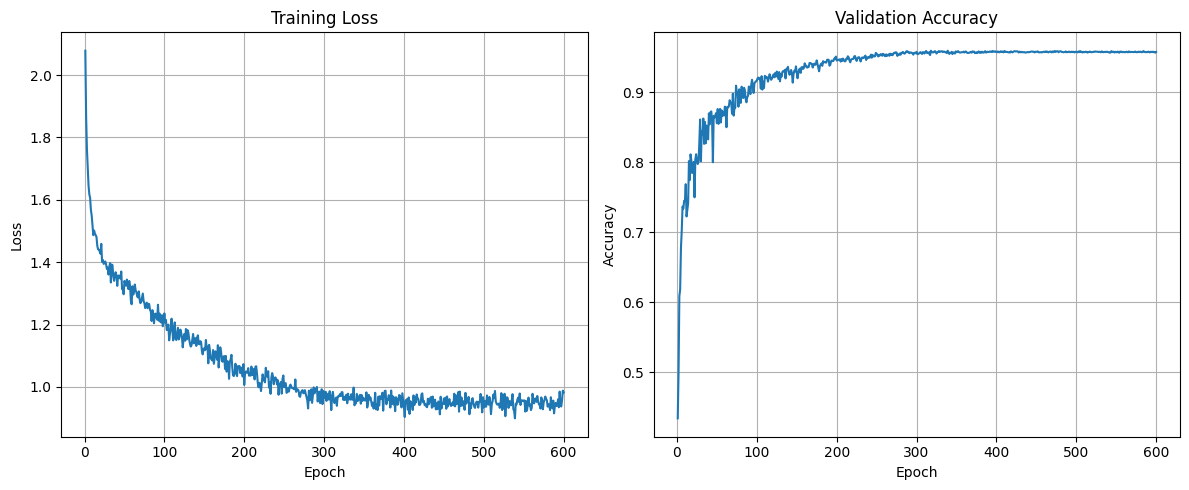

In [19]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, train_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(epochs, val_accuracies)
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()


4. Modify the second network architecture by tuning the layer hyperparameters or adjusting the layer design to improve test accuracy while remaining within the four million parameter limit. Discuss your observations and the trade offs of the changes you make.

There are 3 types of modifications I have done to the model:
- Adjusting layer design
- Tuning layer hyperparameters
- Preprocessing input data
1. Adjusting layer design
I used a model that is similar to ResNet instead of traditional CNN to avoid gradient vanish. There are 3 stages of Residual Block, I find that to be a sweet spot because 2 has lower accuracy and 4 takes longer computational time. Within each block, I use 2 blocks of Conv -> ReLU -> BatchNorm -> Squeeze-Excitation block.
2. I intended to do the traditional 64 -> 128 -> 256 -> 512 filters for each subsequent block, but 512 at last layer has too many hyperparameters so I tuned it down to 278 which has slightly lower than 4M params.
3. For preprocessing, I used data augmentation, and a few more techniques to make the model less prone to overfitting.

## 2. Open discussion questions

1. How did hyperparameter tuning (learning rate, dropout, batch size) affect your model’s accuracy? Were there any unexpected results?

- For my model, I used a relatively high learning rate, and then used a Cosine Annealing LR scheduler to decrease it overtime. So it doesn't matter too much what the initial LR is. At the last quarter of the training process it tends to be at a sweet spot that the model learns the minor details the fastest.
- Dropout 0.05 or 0.45 has only a 0.5% difference in result.
- Batch size being 512 makes the CUDA ran out of memory (I think), so I decreased back to 256 and it ran normally.
- Number of epoch also doesn't affect the end results beyond certain point, as I used Cosine Annealing LR. So 50 or 200 yielded the same result.
- Converntionally, number of filters should be a multiple of 2. I used an odd multiplier like 1.4 and the model did significantly worse.
- And the most unexpected thing is label smoothing. I used it instead of Cross Entropy Loss function, and while it gave the same test accuracy at ~93-94%, the loss is much higher (0.5 instead of 0.01).

2. How did the constraint of keeping the model within 4 million parameters impact your design choices? Would a larger model necessarily perform better?

- As my model has a handicap layer of 278 filters, I believe that is the main reason why it couldn't perform better.
- A larger model does not necessarily mean it can perform better. There are also other factors such as image preprocessing, if the user does not perform correctly, it can lead to the model perform no better than random chance. (For example I once accidentally set all pixels to 0-1 instead of normalizing, making the whole training set black. The model then has 10% accuracy which is basically random guess)

3. How can deep learning models trained on datasets like CIFAR-10 be applied in real-world scenarios? Give an example.

- CIFAR-10 is not a good dataset for real world applications. There are better ones such as ImageNet or DINOv2, however this is a good starting point for AI students. It can be used in low-resolution camera for detecting objects in a student project.

4. Deep learning models for image recognition can have biases. What ethical concerns should be considered when deploying such models?

Surely bias training data leads to bias in predictions, and no dataset can perfectly represents the real world. There will be concerns about interpretability, privacy, responsibility, etc
- Interpretability: when a model makes certain prediction and cannot justify it, people tend to not believe it as much
- Privacy: data collection of images that were not supposed to be taken can be a debatable topic.
- Responsibilty: AI cannot go to jail, therefore someone might have to

5. What was the most interesting or challenging part of this assignment? If you had more time, what additional improvements would you make?

- Playing this AI game is like gambling, I let the model run and expect good results, and when I come back to it, the dopamine rush when I see an unexpected results hit like a truck.
Also this game is expensive, I need to have good GPUs to do enough trials and error so that I can learn something about it.
- I've had enough time with it, but if I had more time, I will try other models like DenseNet or transformer. 